#### Importing Dependencies

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import numpy as np
from shutil import copyfile
import matplotlib.pyplot as plt
import glob
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.5/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


#### Importing Preprossed Data CSV file

In [2]:
data=pd.read_csv('data.csv')
data

,filename,target
0,3908_7_functional.nii,0
1,3418_functional.nii,1
2,4104_4_functional.nii,0
3,4104_6_functional.nii,0
4,4100_4_functional.nii,0
...,...,...
119,3917_4_functional.nii,0
120,3460_4_functional.nii,0
121,3444_functional.nii,1
122,3237_2_functional.nii,0


In [3]:
pwd

'/home/jupyter/Project_Parkinson_Disease'

#### Importing Data

In [4]:
ff = glob.glob('data/all_data/*')

In [6]:
len(ff)

124

#### Initializing an array to store the images

In [7]:
images = []
print(images)

[]


#### Loading inages
#### Shape Correction (taking middle 30 slides for each Scan)
#### Appending the images into Array

In [8]:
for f in range(len(ff)):
    a = nib.load(ff[f])
    print(ff[f])
    l1,l2,l3=a.shape
    #print(l1,l2,l3)
    a = a.get_data()
    #print(a)
    
    z1= int(l3/2) -15
    z2= int(l3/2) +15
    a = a[:,:,z1:z2]
    #print(a)
    #for i in range (len(ff)):
    images.append((a[:,:,:]))
    #print (a.shape)
#print(images)

data/all_data/3908_7_functional.nii
data/all_data/3418_functional.nii
data/all_data/4104_4_functional.nii
data/all_data/4104_6_functional.nii
data/all_data/4100_4_functional.nii
data/all_data/4055_functional.nii
data/all_data/3666_functional.nii
data/all_data/3237_3_functional.nii
data/all_data/3551_2_functional.nii
data/all_data/4100_2_functional.nii
data/all_data/3201_3_functional.nii
data/all_data/3433_functional.nii
data/all_data/3431_functional.nii
data/all_data/3448_functional.nii
data/all_data/4102_functional.nii
data/all_data/3443_functional.nii
data/all_data/4104_2_functional.nii
data/all_data/4111_functional.nii
data/all_data/3225_functional.nii
data/all_data/3551_3_functional.nii
data/all_data/4094_functional.nii
data/all_data/4116_5_functional.nii
data/all_data/3901_3_functional.nii
data/all_data/3917_1_functional.nii
data/all_data/4116_2_functional.nii
data/all_data/4117_functional.nii
data/all_data/3132_functional.nii
data/all_data/3908_2_functional.nii
data/all_data/3235

#### Checking Dimensions of Image stack

In [9]:
imagess=np.asarray(images)

In [10]:
imagess.shape

(124, 128, 128, 30)

#### Min Max Normalization

In [11]:
m = np.max(imagess)
mi = np.min(imagess)

In [12]:
print(m, mi)

32767.0 -607.0


In [13]:
images = (images - mi) / (m - mi)

In [14]:
np.min(images), np.max(images)

(0.0, 1.0)

In [15]:
imagess

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

# CNN

Importing dependencies for CNN

In [16]:
from keras.layers import Conv2D, MaxPooling2D, Conv3D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from plotly.offline import iplot, init_notebook_mode
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
import plotly.graph_objs as go
from matplotlib.pyplot import cm
from keras.models import Model
import numpy as np
import keras
from keras import backend as K
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, model_from_json,Model
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import itertools
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D, Input, Convolution2D

Using TensorFlow backend.


#### Defining Function for
##### Saving MetricsCheckpoint
##### Plotting Confusion Matrix
##### Plotting Learning Curve

In [17]:
# Helper Functions  Learning Curves and Confusion Matrix

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)
def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy')[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

In [18]:
imagess.shape

(124, 128, 128, 30)

#### Reading output Labels
##### PD=1, Control=0

In [19]:
data=pd.read_csv('data.csv')
y=data.target
print(y)

0      0
1      1
2      0
3      0
4      0
      ..
119    0
120    0
121    1
122    0
123    0
Name: target, Length: 124, dtype: int64


#### Splitting 80% traing, 20% for testing

In [20]:
indices=np.arange(124)
x_traincnn,x_testcnn,y_traincnn,y_testcnn,i_train,i_test = train_test_split(imagess,y,indices,test_size=0.2,random_state=13)

#### training and Testing data shapes

In [21]:
print (x_traincnn.shape)
print (y_traincnn.shape)
print (x_testcnn.shape)
print (y_testcnn.shape)

(99, 128, 128, 30)
(99,)
(25, 128, 128, 30)
(25,)


In [22]:
y_traincnn

31     0
93     0
9      0
115    1
29     0
      ..
102    0
16     0
74     1
48     1
82     0
Name: target, Length: 99, dtype: int64

In [25]:
groundtruth=y_testcnn

#### One hot encoding the labels

In [26]:
y_traincnn = keras.utils.to_categorical(y_traincnn, 2)
y_testcnn = keras.utils.to_categorical(y_testcnn, 2)

### Tuned Model Architecture

In [27]:
## input layer
input_layer = Input((128, 128, 30))

## convolutional layers
conv_layer1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding='same')(input_layer)
conv_layer2 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding='same')(conv_layer1)

## add max pooling to obtain the most imformatic features
pooling_layer1 = MaxPooling2D(pool_size=(2, 2))(conv_layer2)

conv_layer3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(pooling_layer1)
conv_layer4 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(conv_layer3)
pooling_layer2 = MaxPooling2D(pool_size=(2, 2))(conv_layer4)

## perform batch normalization on the convolution outputs before feeding it to MLP architecture
pooling_layer2 = BatchNormalization()(pooling_layer2)
flatten_layer = Flatten()(pooling_layer2)

## create an MLP architecture with dense layers : 2048 -> 512 -> 2
## add dropouts to avoid overfitting / perform regularization
dense_layer1 = Dense(units=2048, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.5)(dense_layer1)
dense_layer2 = Dense(units=512, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.5)(dense_layer2)
output_layer = Dense(units=2, activation='softmax')(dense_layer2)

## define the model with input layer and output layer
model = Model(inputs=input_layer, outputs=output_layer)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



#### Model Summary

In [28]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 30)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      8672      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0   

#### Implementing Learning rate reduction patience of 3 epochs
#### Checkpointer to save model in each successful epoch
#### Early stop patience=5 epochs

In [31]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
checkpointer = ModelCheckpoint('pd_cnn.h5',monitor='val_acc', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(patience=5, verbose=1)

#### Training Environment Configuration

In [32]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16312774051038615652
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 13593215060183973471
physical_device_desc: "device: XLA_CPU device"
]


#### Model Compilation
##### LR 0.1, Adadelta optimizer, epochs=15

In [33]:
model.compile(loss=categorical_crossentropy, optimizer=Adadelta(lr=0.1), metrics=['acc'])
# Without data augmentation
history = model.fit(x_traincnn, y_traincnn, batch_size = 20, epochs = 15, validation_data = (x_testcnn, y_testcnn), verbose = 2,
                   callbacks = [MetricsCheckpoint('logs'),earlystopper,learning_rate_reduction,checkpointer])




Train on 99 samples, validate on 25 samples
Epoch 1/15
 - 11s - loss: 3.4830 - acc: 0.5859 - val_loss: 13.9396 - val_acc: 0.5200

Epoch 00001: val_acc improved from -inf to 0.52000, saving model to pd_cnn.h5
Epoch 2/15
 - 8s - loss: 3.8342 - acc: 0.4848 - val_loss: 18.4404 - val_acc: 0.4800

Epoch 00002: val_acc did not improve from 0.52000
Epoch 3/15
 - 8s - loss: 1.5435 - acc: 0.6768 - val_loss: 7.3835 - val_acc: 0.4800

Epoch 00003: val_acc did not improve from 0.52000
Epoch 4/15
 - 8s - loss: 1.3298 - acc: 0.6162 - val_loss: 3.6263 - val_acc: 0.4800

Epoch 00004: val_acc did not improve from 0.52000
Epoch 5/15
 - 8s - loss: 1.2700 - acc: 0.7071 - val_loss: 0.7053 - val_acc: 0.6400

Epoch 00005: val_acc improved from 0.52000 to 0.64000, saving model to pd_cnn.h5
Epoch 6/15
 - 8s - loss: 1.1787 - acc: 0.7475 - val_loss: 1.0519 - val_acc: 0.6400

Epoch 00006: val_acc did not improve from 0.64000
Epoch 7/15
 - 9s - loss: 1.2051 - acc: 0.6869 - val_loss: 2.1069 - val_acc: 0.4400

Epoch

#### Testing Accuracy

In [34]:
score = model.evaluate(x_testcnn, y_testcnn, verbose=0)
print('\nKeras CNN #1C - accuracy:', score[1],'\n')
y_pred = model.predict(x_testcnn)


Keras CNN #1C - accuracy: 0.800000011920929 



In [35]:
map_characters = {0: 'Control', 1: 'PD'}
dict_characters = {0: 'Control', 1: 'PD'}
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

#### Visualizing Classification report,
#### Visualizing Learning Curve
#### Visualizing Confusion or Classification Matrix


              precision    recall  f1-score   support

     Control       0.75      0.92      0.83        13
          PD       0.89      0.67      0.76        12

    accuracy                           0.80        25
   macro avg       0.82      0.79      0.79        25
weighted avg       0.82      0.80      0.80        25



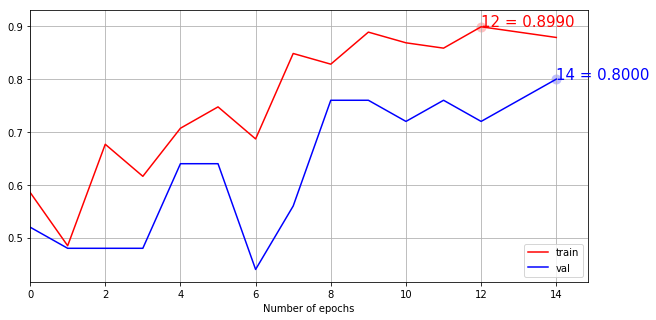

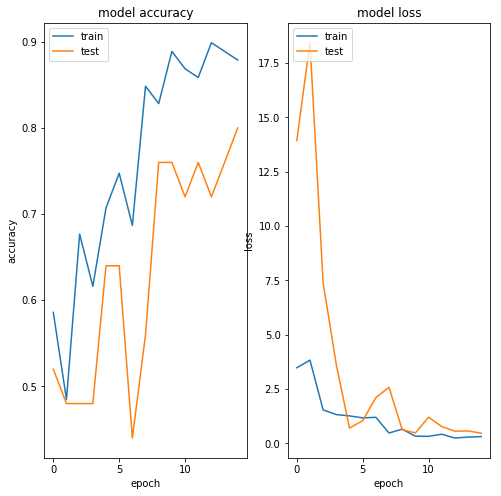

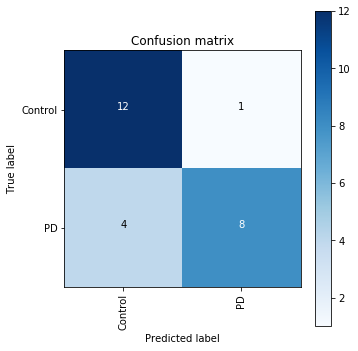

In [38]:
print('\n', sklearn.metrics.classification_report(np.where(y_testcnn > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_testcnn,axis=1) 
plotKerasLearningCurve()
plt.savefig('')
#plt.show()  
plot_learning_curve(history)
plt.savefig('learning_curve')
#plt.show()

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.savefig('Confusion_matrix')
#plt.show()

#### Predictions

In [39]:
Y_pred_classes

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0])

In [40]:
a=str(Y_pred_classes)
#print(a)
b=a[1:-1]
b=b.replace(" ", "")

#### ground truth

In [41]:
print(groundtruth)

14     1
89     1
55     1
85     0
105    0
15     1
50     1
53     0
87     0
39     1
30     1
42     0
111    0
12     1
90     0
23     0
57     0
43     0
59     1
113    0
109    0
106    1
95     1
110    1
60     0
Name: target, dtype: int64


In [42]:
groundtruth = groundtruth.tolist()

In [43]:
print(groundtruth)

[1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]


#### Comparison Test files Prediction VS Ground truth

In [44]:
count=0;
for i in range(25):
    print(i_test[i])
    print(i,' ',data.filename[i_test[i]],' prediction:',b[i],"Actual",groundtruth[i])

14
0   4102_functional.nii  prediction: 1 Actual 1
89
1   4108_functional.nii  prediction: 1 Actual 1
55
2   4113_functional.nii  prediction: 1 Actual 1
85
3   4105_1_functional.nii  prediction: 0 Actual 0
105
4   4105_5_functional.nii  prediction: 0 Actual 0
15
5   3443_functional.nii  prediction: 1 Actual 1
50
6   3445_functional.nii  prediction: 1 Actual 1
53
7   4104_3_functional.nii  prediction: 0 Actual 0
87
8   4100_1_functional.nii  prediction: 0 Actual 0
39
9   3900_functional.nii  prediction: 1 Actual 1
30
10   4135_functional.nii  prediction: 0 Actual 1
42
11   4104_9_functional.nii  prediction: 0 Actual 0
111
12   4104_5_functional.nii  prediction: 0 Actual 0
12
13   3431_functional.nii  prediction: 1 Actual 1
90
14   4105_2_functional.nii  prediction: 0 Actual 0
23
15   3917_1_functional.nii  prediction: 0 Actual 0
57
16   3468_4_functional.nii  prediction: 0 Actual 0
43
17   4085_3_functional.nii  prediction: 1 Actual 0
59
18   3423_functional.nii  prediction: 0 Actual 1
